# Loading and Arranging the Data
### I have used pandas and numpy library to work on this dataset. And to plot graphs I have used matplotlib

In [446]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [447]:
data=pd.read_csv('intern_dataset.csv',parse_dates=['Time'])

In [448]:
data.dtypes

Time       datetime64[ns]
Signal1           float64
Signal2           float64
Label              object
dtype: object

In [449]:
data.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [450]:
dataA=data[data['Label']=="A"]
dataB=data[data['Label']=="B"]
dataC=data[data['Label']=="C"]

In [451]:
label1=["A","B","C"]

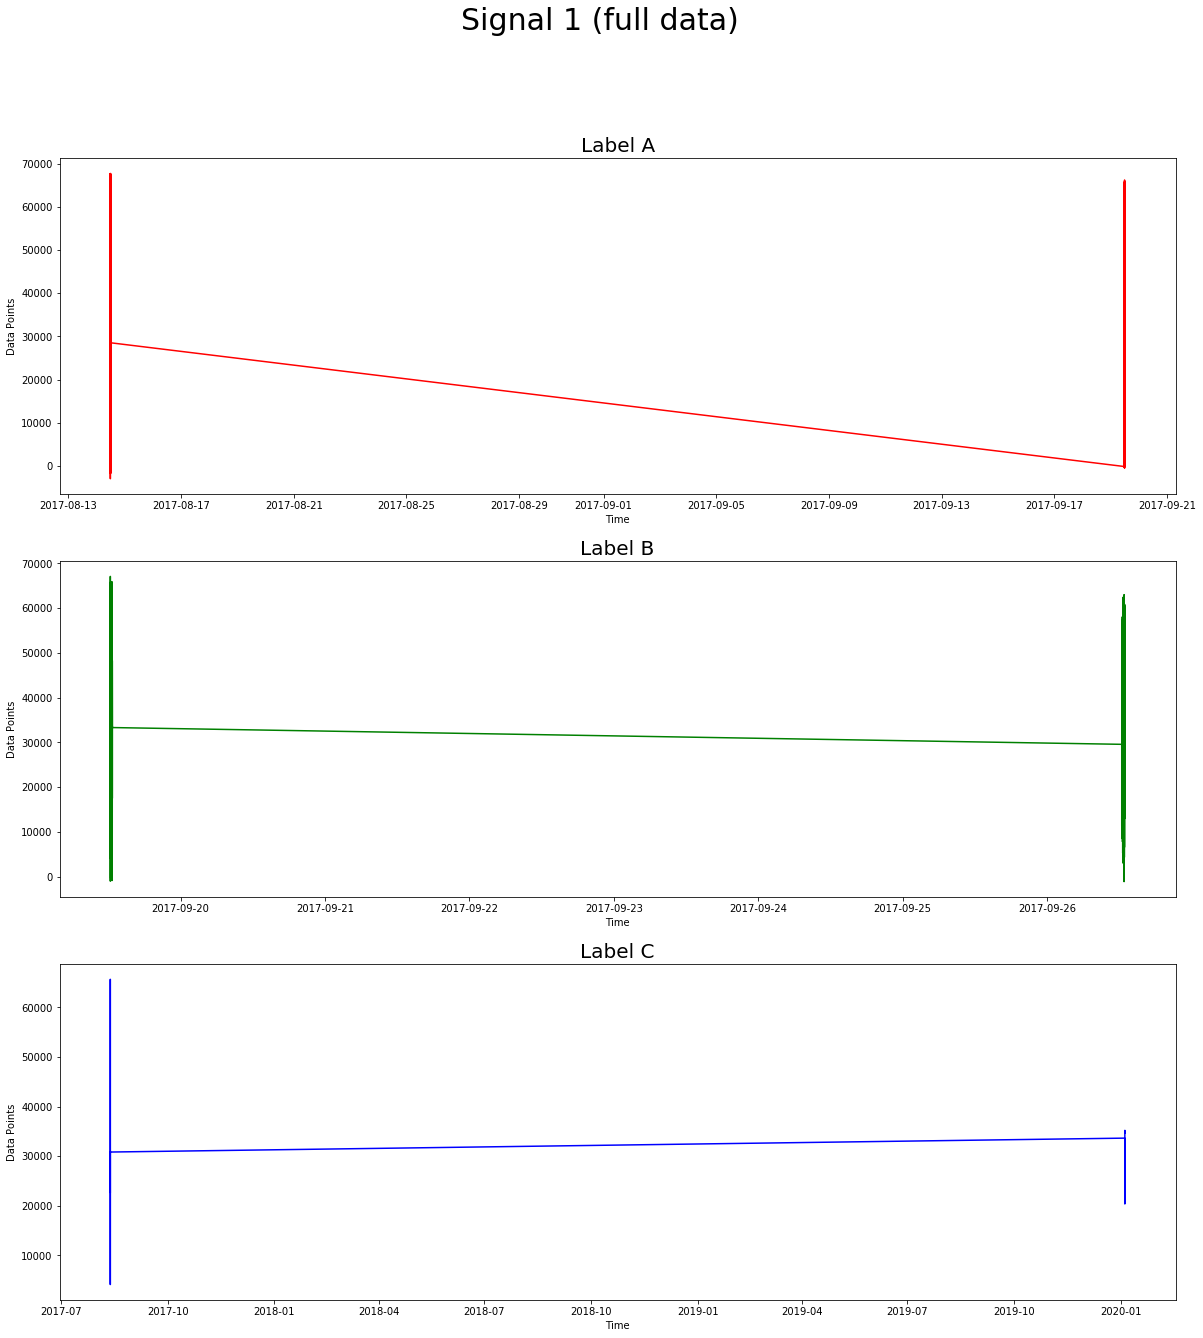

In [452]:
fig,ax=plt.subplots(3,figsize=(20,21))

# For Plotting 
ax[0].plot(dataA['Time'],dataA['Signal1'],'r',label="A")
ax[1].plot(dataB['Time'],dataB['Signal1'],'g',label="B")
ax[2].plot(dataC['Time'],dataC['Signal1'],'b',label="C")

# For Labeling
for i,j in zip(ax,label1):
    i.set_title(f"Label {j}",size=20)
fig.suptitle("Signal 1 (full data)",size=30)

for x in ax.flat:
    x.set(xlabel='Time', ylabel='Data Points')


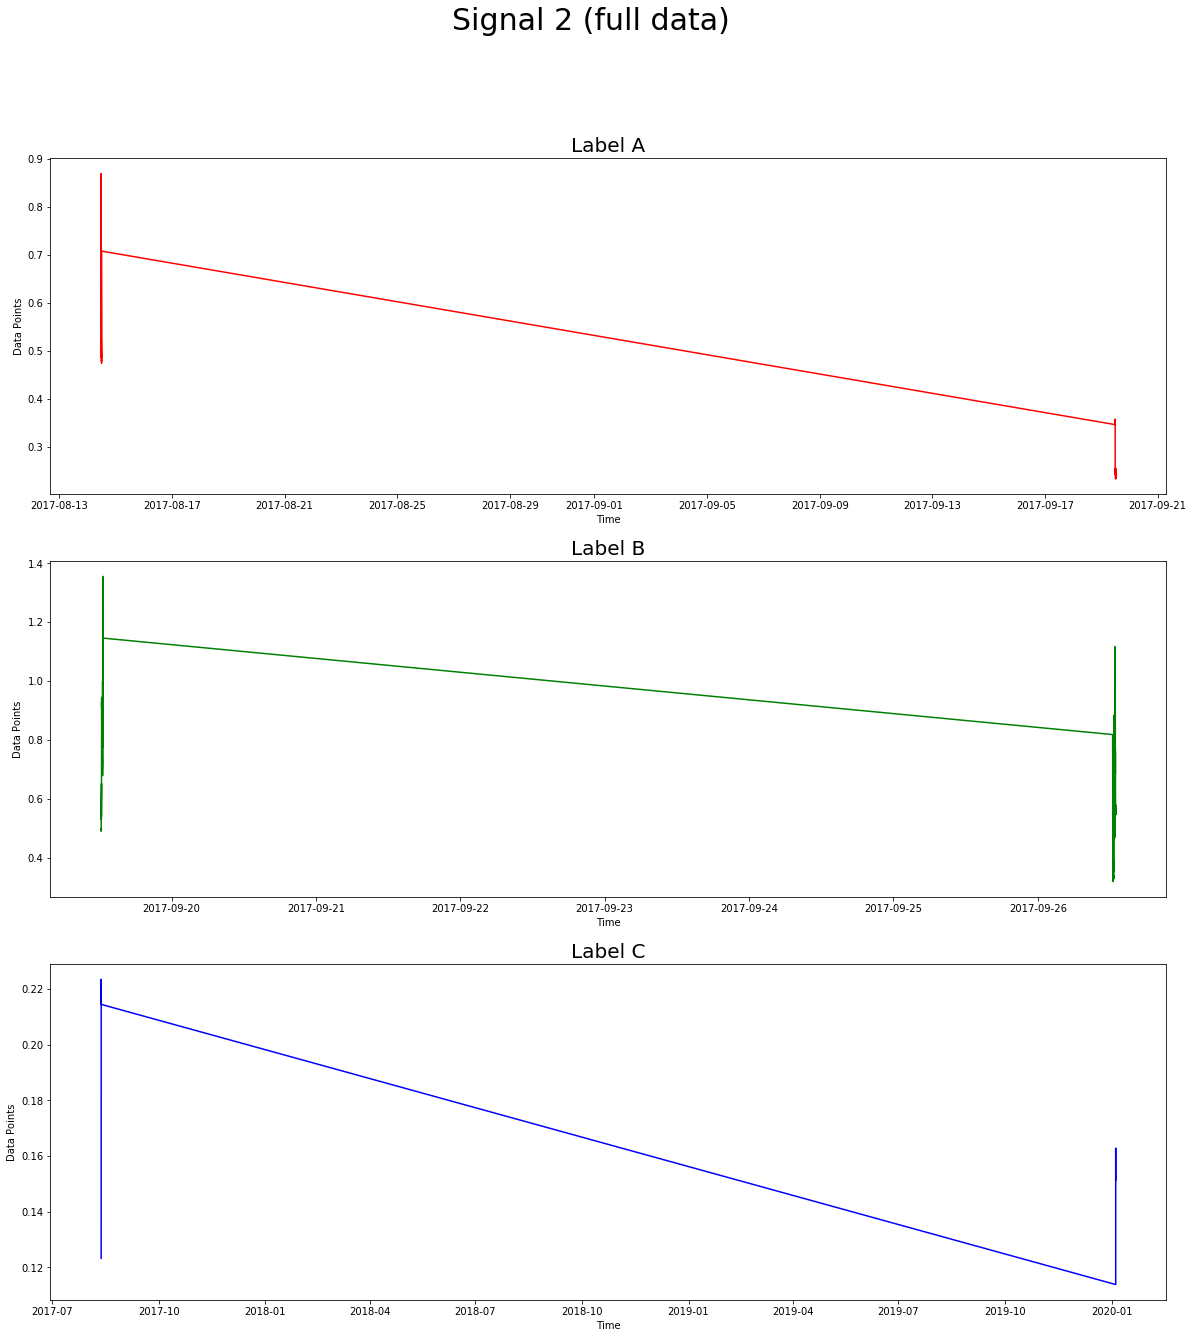

In [453]:
fig,ax=plt.subplots(3,figsize=(20,21))

# For Plotting 
ax[0].plot(dataA['Time'],dataA['Signal2'],'r')
ax[1].plot(dataB['Time'],dataB['Signal2'],'g')
ax[2].plot(dataC['Time'],dataC['Signal2'],'b')

# For Labeling
for i,j in zip(ax,label1):
    i.set_title(f"Label {j}",size=20)
fig.suptitle("Signal 2 (full data)",size=30)

for x in ax.flat:
    x.set(xlabel='Time', ylabel='Data Points')

#### When plotting the whole data on a graph, we can see that the dataset is seperated into two parts for each class. So we divide the dataset into two parts.

# Dividing and Plotting each class-data into two parts
### A1 is the first part of class A  and A2 is the second part of class A. Similarly for each class.

In [454]:
dataA1=dataA[dataA['Time']<'2017-09-01 00:00:00.000']
dataA2=dataA[dataA['Time']>'2017-09-01 00:00:00.000']

In [455]:
dataB1=dataB[dataB['Time']<'2017-09-22 00:00:00.000']
dataB2=dataB[dataB['Time']>'2017-09-22 00:00:00.000']

In [456]:
dataC1=dataC[dataC['Time']<'2018-07-11 00:00:00.000']
dataC2=dataC[dataC['Time']>'2018-07-11 00:00:00.000']

In [457]:
def size(data1,data2):
    q=data1.shape
    w=data2.shape
    e=int(q[0])+int(w[0])
    return q,w,(e,4)

In [458]:
print(size(dataA1,dataA2))

((132000, 4), (186000, 4), (318000, 4))


In [459]:
print(size(dataB1,dataB2))

((126000, 4), (186000, 4), (312000, 4))


In [460]:
print(size(dataC1,dataC2))

((192000, 4), (90000, 4), (282000, 4))


In [461]:
label2=['A1','A2','B1','B2','C1','C2']

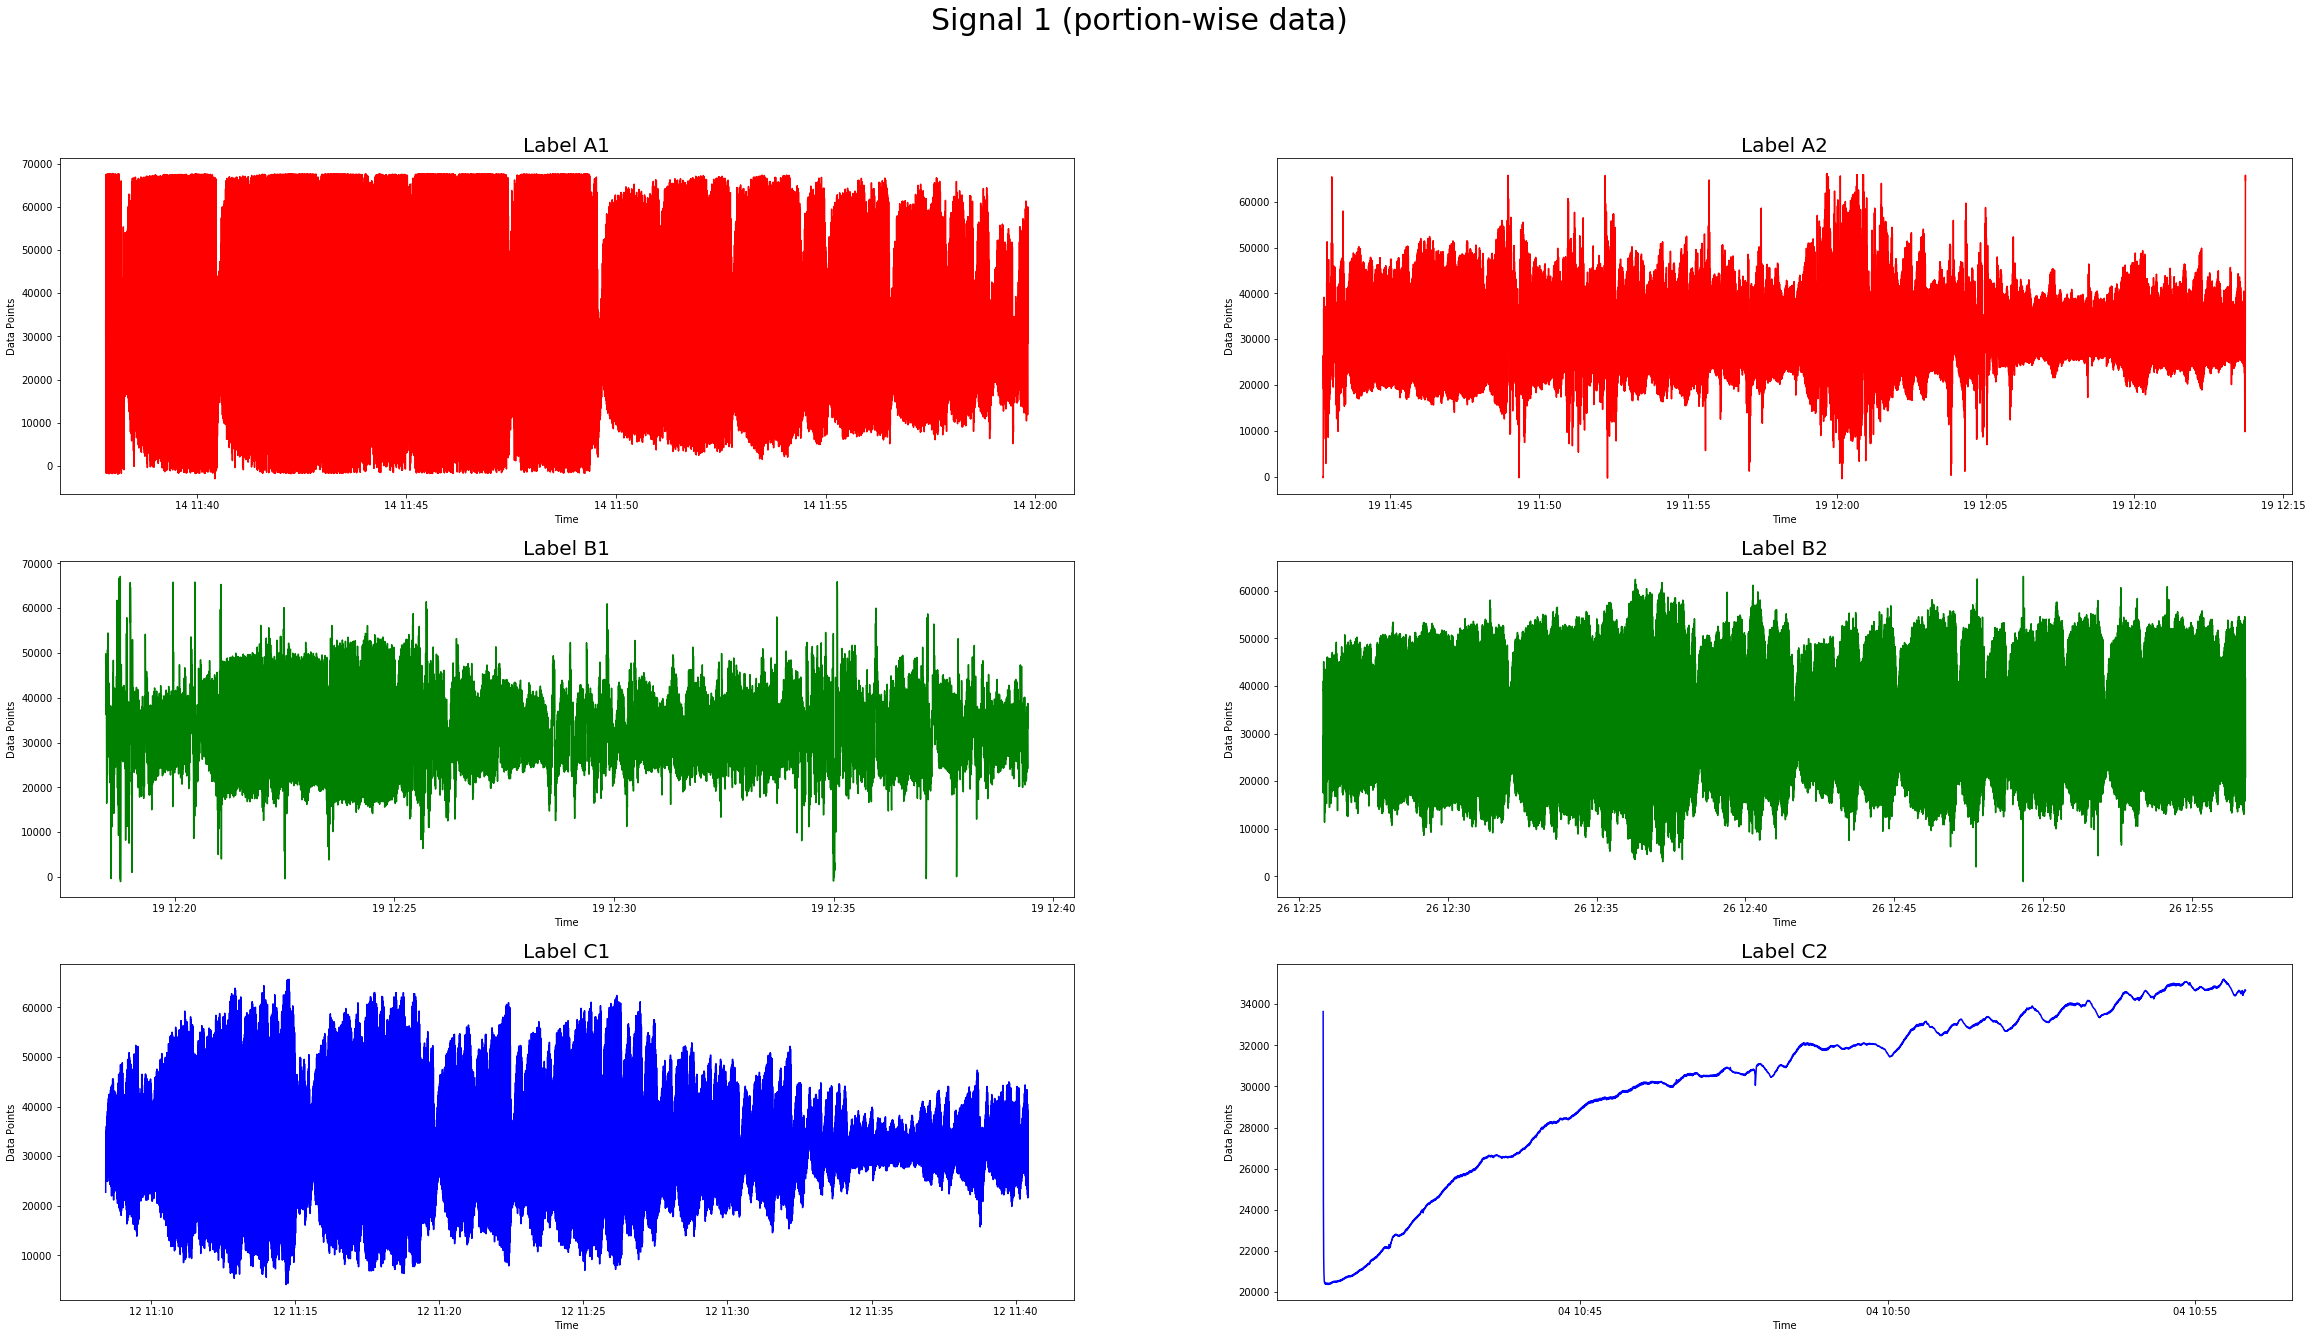

In [462]:
fig,ax=plt.subplots(3,2,figsize=(40,21))

# For ploting
ax[0][0].plot(dataA1['Time'],dataA1['Signal1'],'r')
ax[0][1].plot(dataA2['Time'],dataA2['Signal1'],'r')
ax[1][0].plot(dataB1['Time'],dataB1['Signal1'],'g')
ax[1][1].plot(dataB2['Time'],dataB2['Signal1'],'g')
ax[2][0].plot(dataC1['Time'],dataC1['Signal1'],'b')
ax[2][1].plot(dataC2['Time'],dataC2['Signal1'],'b')

# For Labeling
for i,j in zip(ax.flatten(),label2):
    i.set_title(f"Label {j}",fontsize=20)
fig.suptitle("Signal 1 (portion-wise data)",fontsize=30)

for x in ax.flat:
    x.set(xlabel='Time', ylabel='Data Points')

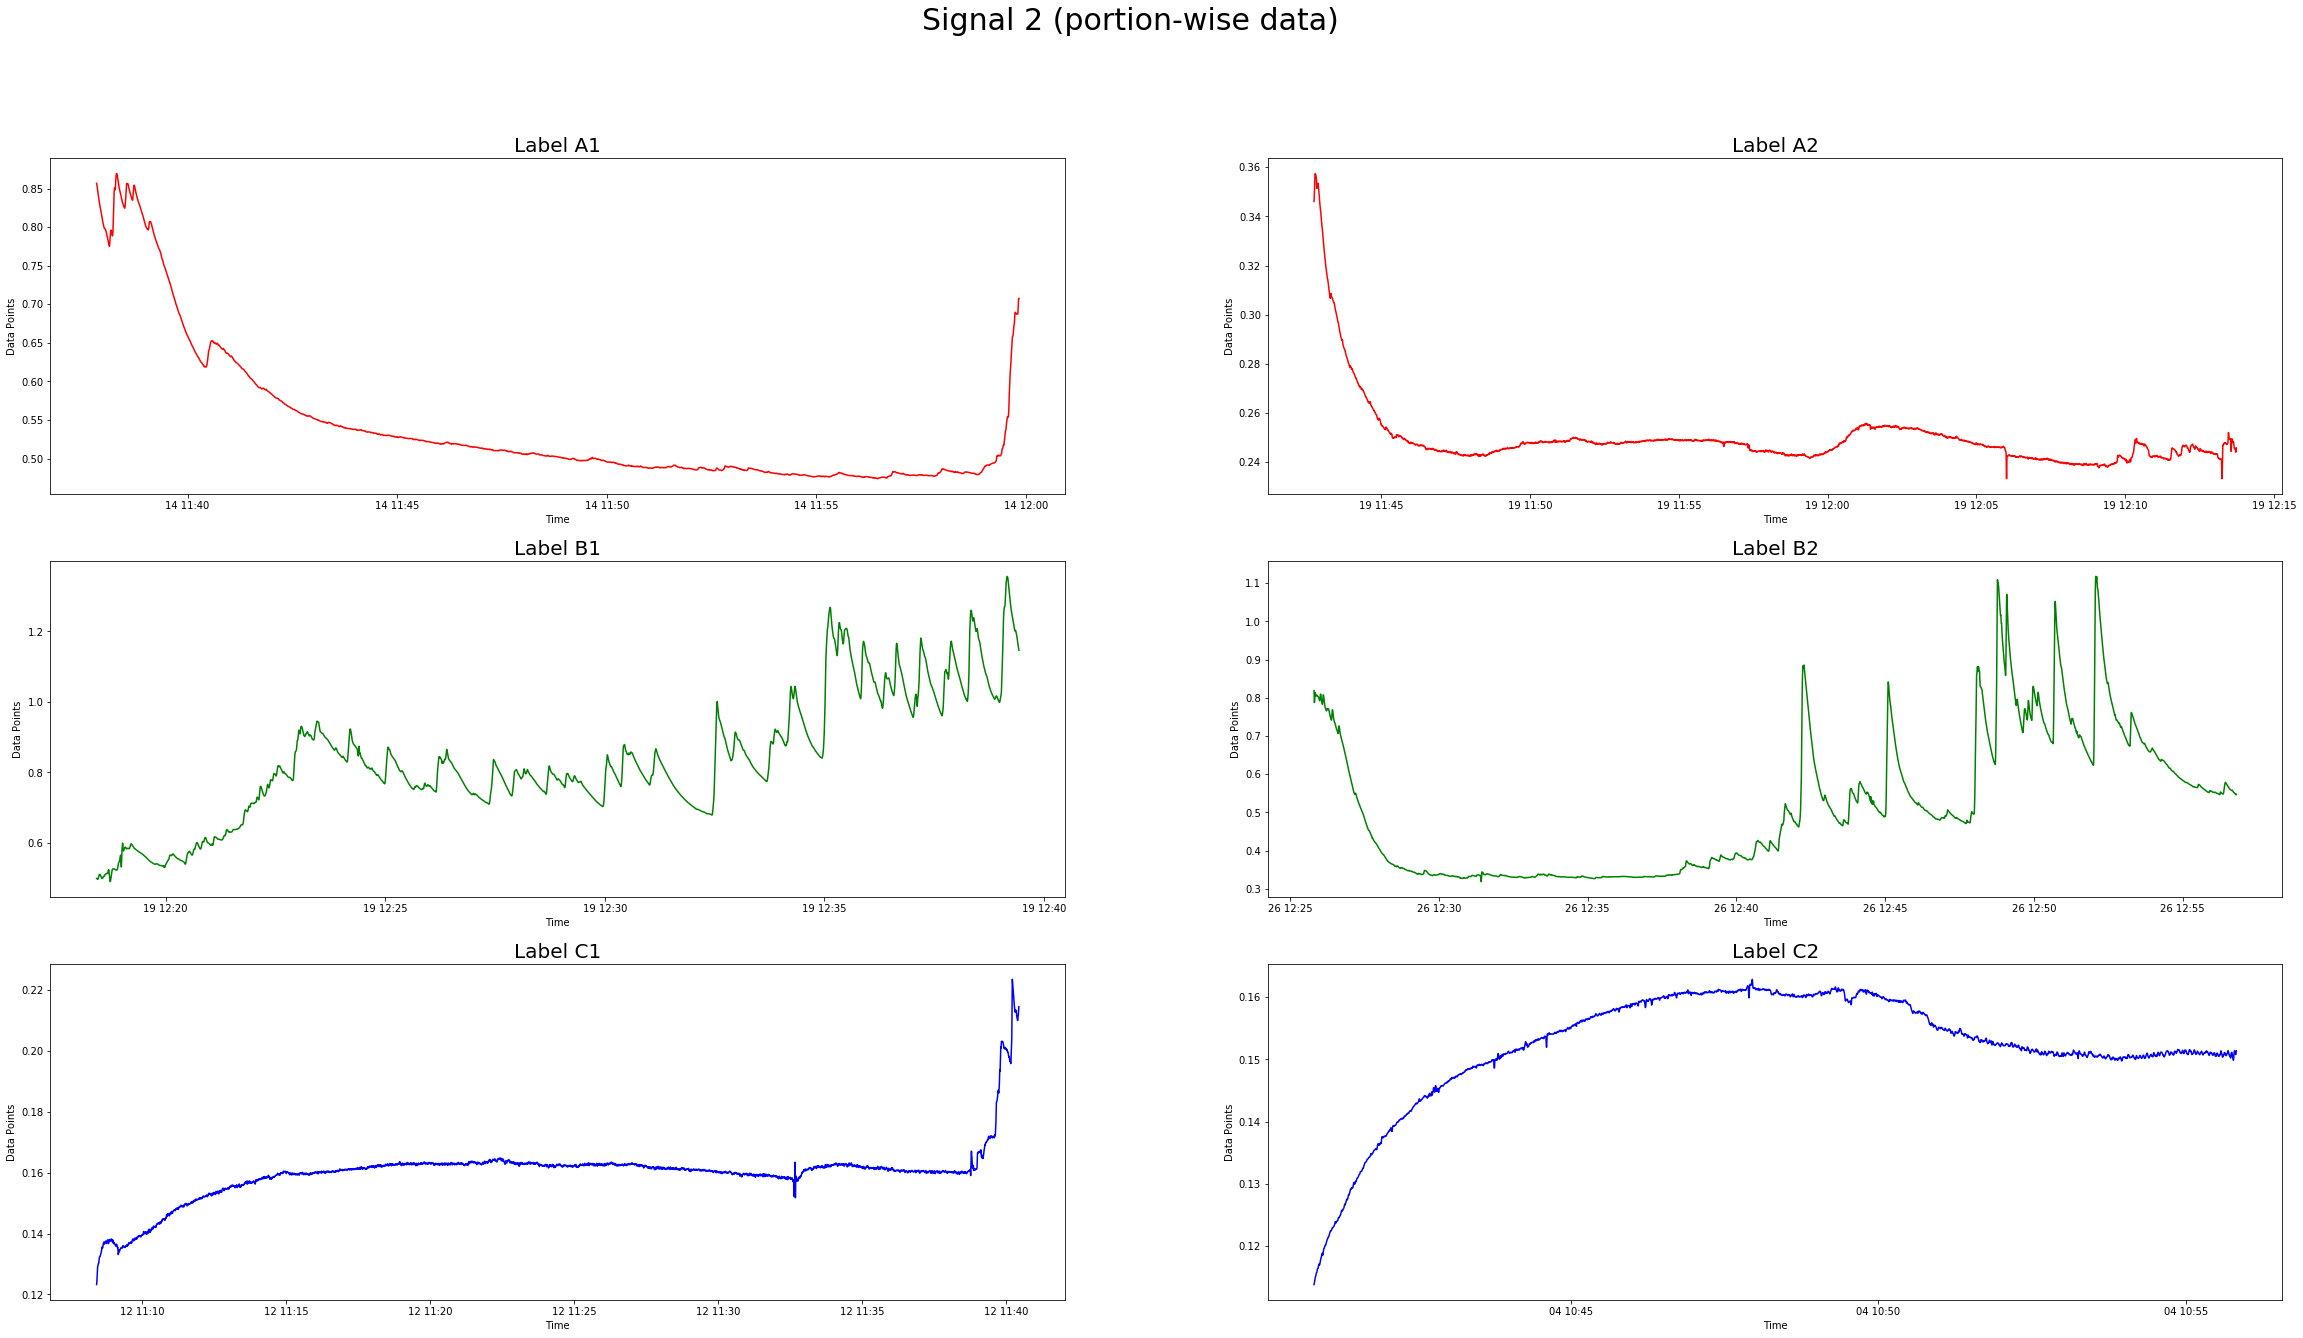

In [463]:
fig,ax=plt.subplots(3,2,figsize=(40,21))

# For ploting
ax[0][0].plot(dataA1['Time'],dataA1['Signal2'],'r')
ax[0][1].plot(dataA2['Time'],dataA2['Signal2'],'r')
ax[1][0].plot(dataB1['Time'],dataB1['Signal2'],'g')
ax[1][1].plot(dataB2['Time'],dataB2['Signal2'],'g')
ax[2][0].plot(dataC1['Time'],dataC1['Signal2'],'b')
ax[2][1].plot(dataC2['Time'],dataC2['Signal2'],'b')

# For Labeling
for i,j in zip(ax.flatten(),label2):
    i.set_title(f"Label {j}",fontsize=20)
fig.suptitle("Signal 2 (portion-wise data)",fontsize=30)

for x in ax.flat:
    x.set(xlabel='Time', ylabel='Data Points')

# Fractal Analysis using Hurst Exponent

#### H = 0.5 — Brownian motion ie. totally random behaviour.
#### 0.5 < H < 1.0 — persistent behavior ie. if the trend is increasing it will keep on increasing and vice versa.
#### 0 < H < 0.5 — anti-persistent behavior ie. if the trend is increasing it will be opposite of the trend and vice versa.

In [464]:
from hurst import compute_Hc

In [465]:
def hurst_plot(data):
    H, c, val = compute_Hc(data)
    print(f"Hurst Exponent is: {H}")
    axes = plt.subplots()[1]
    axes.plot(val[0], c*val[0]**H, color="blue")
    axes.scatter(val[0], val[1], color="red")
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel('Time interval')
    axes.set_ylabel('R/S ratio')
    axes.grid(True)

## 1. Class A analysis

### SIGNAL 1
 The part 1 of class A (A1) has Hurst exponent close to 0, this means that A1 shows a tendency of reversing the trend it is currently following.
 The part 2 of class A (A2) has Hurst exponent close to 0, this means it also follows trend reversing behaviour.

### Conclusion
 Class A remains consistent throughout the Signal 1

Hurst Exponent is: -0.058232615042118525
Hurst Exponent is: 0.06435704481351467


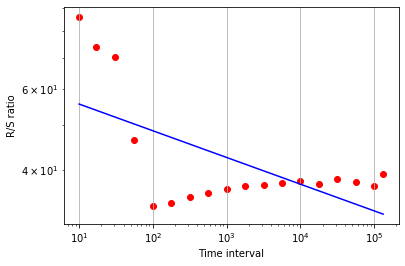

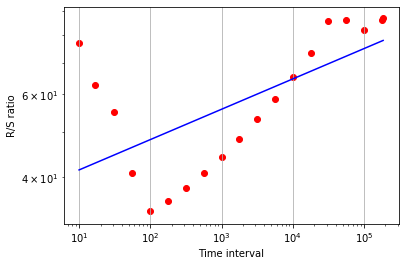

In [466]:
hurst_plot(dataA1['Signal1'])
hurst_plot(dataA2['Signal1'])

### SIGNAL 2  
A1 has Hurst exponent equals 0.492, this means it follows Brownian motion and its behaviour is totally random.
A2 has a Hurst exponent of slightly greater than 0.5 (0.56), implying a slight persistent behaviour similar to the current trend but can also be interpreted as random.

### Conclusion
Class A also remains consistent throughout the Signal 2

Hurst Exponent is: 0.4922170929999221
Hurst Exponent is: 0.560538959541712


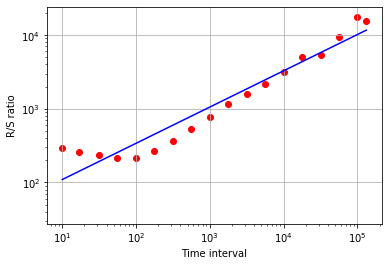

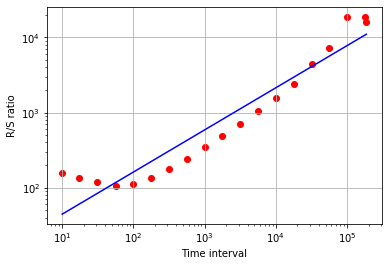

In [467]:
hurst_plot(dataA1['Signal2'])
hurst_plot(dataA2['Signal2'])

## 2. Class B analysis
### SIGNAL 1
 B1 and B2 both have hurst exponent close to 0 implying that they have trend reversing nature.
### Conclusion
Class B remains consistent throughout the Signal 1

Hurst Exponent is: 0.06687979293644157
Hurst Exponent is: -0.01412032439225958


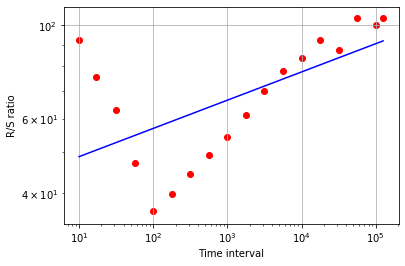

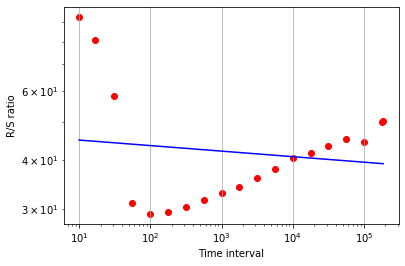

In [468]:
hurst_plot(dataB1['Signal1'])
hurst_plot(dataB2['Signal1'])

### SIGNAL 2
 B1 has H=0.209, stating that it follows trend reversing nature
 B2 has H=0.290, it also has trend reversing nature.
### Conclusion
 Class B also remains consistent throughout the Signal 2.  Also C2 is consistent among both Signal 1 and Signal 2. 

Hurst Exponent is: 0.2096404568251735
Hurst Exponent is: 0.29042063084254316


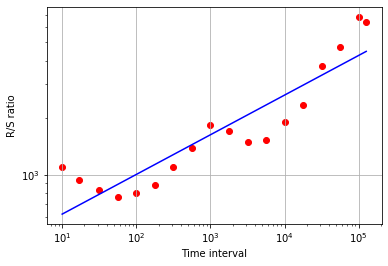

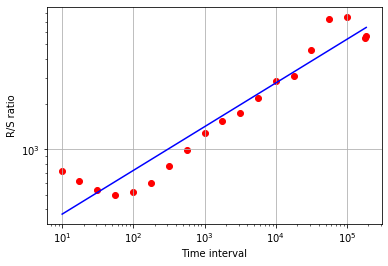

In [469]:
hurst_plot(dataB1['Signal2'])
hurst_plot(dataB2['Signal2'])

## 3. Class C analysis
### SIGNAL 1
 C1 has H close to 0 implying reversing nature.
 C2 has H=0.417 < 0.5 implying a slight random nature.

### Conclusion
Class C has different nature at different points in time for Signal 1.

Hurst Exponent is: 0.030752073147352302
Hurst Exponent is: 0.4174883907259004


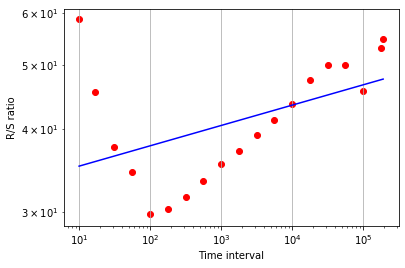

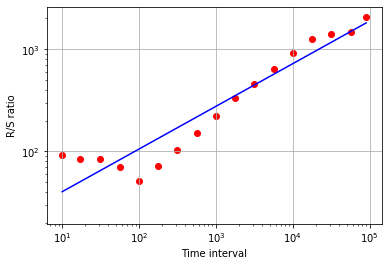

In [476]:
hurst_plot(dataC1['Signal1'])
hurst_plot(dataC2['Signal1'])

### SIGNAL 2
C1 has H=0.45  impying a slight probability of reversing nature.
C2 has H=0.54 implying a slight probability of persistent nature.

### Conclusion
Class C remains consistent throughout the Signal 2. Also C2 is consistent among both Signal 1 and Signal 2.


Hurst Exponent is: 0.45761394426371155
Hurst Exponent is: 0.543535837626303


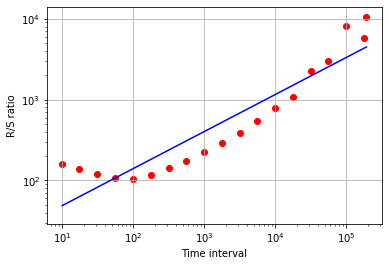

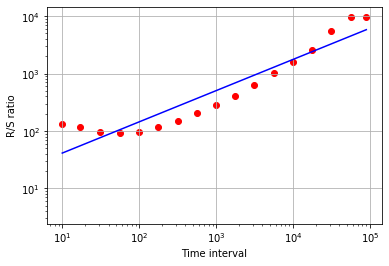

In [471]:
hurst_plot(dataC1['Signal2'])
hurst_plot(dataC2['Signal2'])

# Fractal Analysis using Higuichi Exponent


###### For a Random series Higuichi's dim = 2
###### For a smooth curve Higuichi's dim = 1
###### For fractals 1 < Higuichi's dim < 2 

In [ ]:
import hfda

In [608]:
hfda.measure(dataA1["Signal1"],k_max=50),hfda.measure(dataA2["Signal1"],k_max=50)

(1.2090312798757306, 1.210673959817474)

In [609]:
hfda.measure(dataA1["Signal2"],k_max=50),hfda.measure(dataA2["Signal2"],k_max=50)

(1.0149901175278868, 1.0448246703207662)

In [610]:
hfda.measure(dataB1["Signal1"],k_max=50),hfda.measure(dataB2["Signal1"],k_max=50)

(1.2017465205668125, 1.3218853375949429)

In [611]:
hfda.measure(dataB1["Signal2"],k_max=50),hfda.measure(dataB2["Signal2"],k_max=50)

(1.0032646197446247, 1.0043140035927933)

In [612]:
hfda.measure(dataC1["Signal1"],k_max=50),hfda.measure(dataC2["Signal1"],k_max=50)

(1.3038243033151768, 1.20967288247378)

In [613]:
hfda.measure(dataC1["Signal2"],k_max=50),hfda.measure(dataC2["Signal2"],k_max=50)

(1.0438137427564724, 1.0545292416033734)